<a href="https://colab.research.google.com/github/Sudu-hub/fashion_mnist_data/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#tensorflow and tf.keras 
import tensorflow as tf

#helper libraries
import numpy as np
import matplotlib.pyplot as plt

#version tf
print(tf.__version__)

2.7.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
#shapes of training and test images is

In [5]:
print("the shape of training images is:",train_images.shape)
print("the shape of training label is:",train_labels.shape)

the shape of training images is: (60000, 28, 28)
the shape of training label is: (60000,)


In [6]:
print("the shape of test images is",test_images.shape)
print("the shape of test labels is:",test_labels.shape)

the shape of test images is (10000, 28, 28)
the shape of test labels is: (10000,)


#labels of the fashion design dataset

In [12]:
class_names = ["T-shirts/top",
               "Trouer",
               "Pullover",
               "Dress",
               "Coat",
               "Sandal",
               "Shirt",
               "Sneaker",
               "Bag",
               "Ankle boot"]

#labels values

In [14]:
print("the labels values range from:",np.min(train_labels),"to",np.max(train_labels))

the labels values range from: 0 to 9


#Pixel values


the pixel values range from: 0 to 255


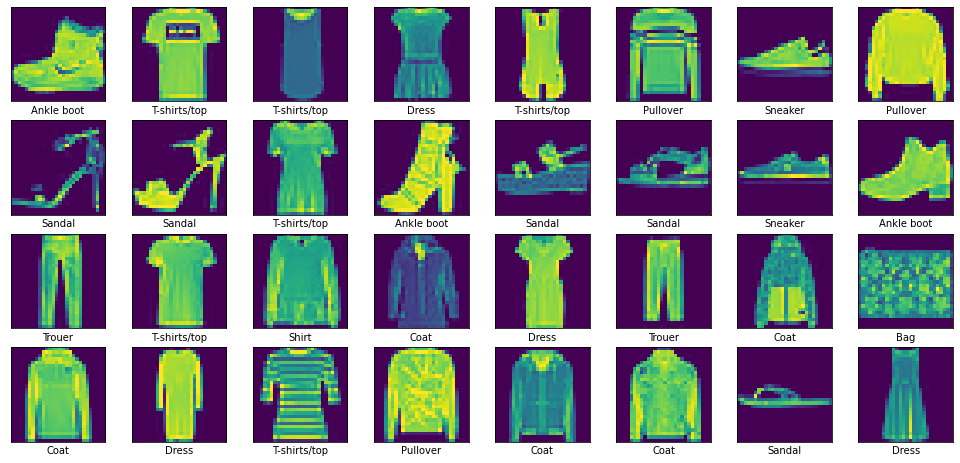

In [16]:
print("the pixel values range from:",np.min(train_images),"to",np.max(train_images))

plt.figure(figsize=(17,8))
for i in range(32):
  plt.subplot(4,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i]])
plt.show()

#normallizing the data

In [17]:
train_images_normal = train_images / 255.0

test_images_normal = test_images / 255.0

the pixel values from: 0.0 to 1.0


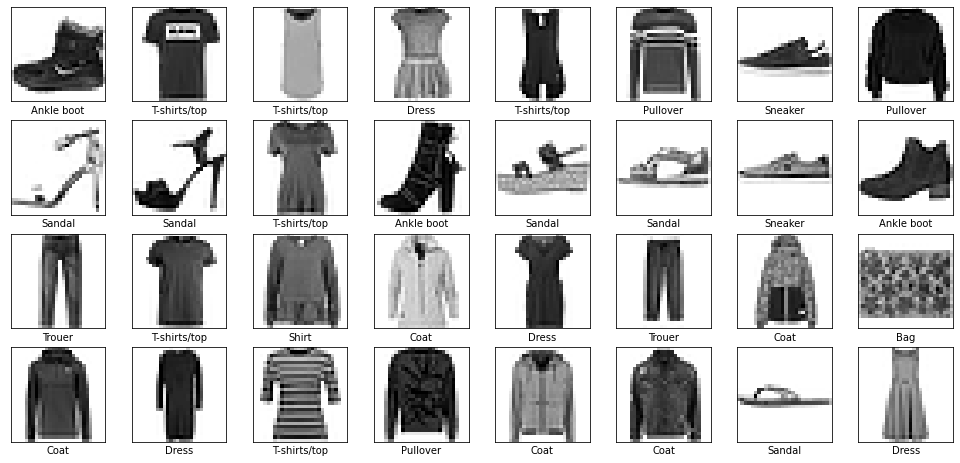

In [19]:
print("the pixel values from:",np.min(train_images_normal),"to",np.max(test_images_normal))

plt.figure(figsize=(17,8))
for i in range(32):
  plt.subplot(4,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images_normal[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

#build the model

In [20]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#so compile the model

In [23]:
model.compile(optimizer = "adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
              metrics=["accuracy"])

#train the model

In [24]:
model.fit(train_images_normal, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5029 - accuracy: 0.8232
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3765 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3380 - accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3137 - accuracy: 0.8838
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2943 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2799 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2676 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2561 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2484 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

#Evaluate the Model

In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("Test accuracy:", round(test_acc*100), "%")

313/313 - 0s - loss: 60.2853 - accuracy: 0.8641 - 488ms/epoch - 2ms/step
Test accuracy: 86 %


#make prediction

In [26]:
prediction = model.predict(test_images_normal)

In [27]:
prediction[0]

array([2.0217298e-08, 8.7479933e-11, 4.6750587e-10, 4.5510089e-12,
       1.1834776e-09, 6.4854865e-04, 4.3187032e-10, 3.4200826e-03,
       3.8703121e-08, 9.9593133e-01], dtype=float32)

In [28]:
max_confidence = np.argmax(prediction[0])

print("The highest confidence is:",max_confidence)
print("The prediction class is:", class_names[max_confidence])

The highest confidence is: 9
The prediction class is: Ankle boot


In [29]:
print("The test label is:", test_labels[0])
print("the test class is:",class_names[0])

The test label is: 9
the test class is: T-shirts/top


#verify and visualize the prediction

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


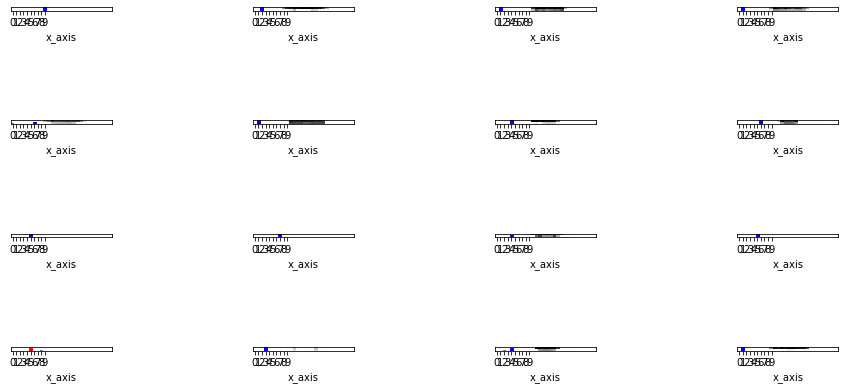

In [32]:
plt.figure(figsize=(17,8))

for i in range(16):
  plt.subplot(4,8,2*i+1)
  plt.xticks([])
  plt.yticks([])
  if np.argmax(prediction[i] == test_labels[i]):
    color = "blue"
  else:
    color = "red"
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.xlabel("x_axis")
  plt.subplot(4,8,2*i+1)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), prediction[i], color="grey")
  plt.ylim([0,1])
  thisplot[np.argmax(prediction[i])].set_color("red")
  thisplot[test_labels[i]].set_color("blue")

plt.show()

In [33]:
#grab the images from the dataset
img = test_images[50]
print(img.shape)

(28, 28)


In [34]:
#Add the image to a batch where its the only member
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [35]:
prediction_img = model.predict(img)
max_confidence = np.argmax(prediction[0])

print("the highest connfidence is:",max_confidence)
print("the predicted class is:",class_names[max_confidence])

the highest connfidence is: 9
the predicted class is: Ankle boot
